## Parameterwahl:
### Listentyp der Elemente:
N : Normale Liste
<br>
F : Optimierte Liste - die Schlüssel der Elemente werden zusätlich in einem Int-Array abgespeichert, um Cache-Misses zu minimieren
<br>
### Algorithmus:
#### InsertionSort O(n^2)
In : InsertionSort
<br>
If : optimiertes InsertionSort - Anzahl der Vertauschungen minimieren
<br>
Im : InsertionSort mit Markierung - keine Zeitverbesserung
#### SelectionSort O(n^2)
S : einfaches SelectionSort - Vergleiche O(n^2), aber Vertauschungen O(n)
#### Quicksort O(n*log(n))*
Qm1f : Pivot: Middle, rekursiv
<br>
Qm1t : Pivot: Middle, iterativ
<br>
Qt1t : Pivot: Median of three, iterativ
<br>
Qt1f : Pivot: Median of three, rekursiv
<br>
Qr1t : Pivot: Random, iterativ
#### Heapsort O(n*log(n))
PH : primitives Heapsort
<br>
H : Heapsort
### Instanzen
B : random, reversed und almost sorted
<br>
R : nur random
### Kleinstes N [Tausend]
### Schrittweite [Tausend]
### Größtes N [Tausend]
### Optional: Datei zur Abspeicherung der analysierten Informationen

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

## Loading Data

In [6]:
raw_data = pd.read_csv('data/Analyse.csv', header=None)

raw_data.columns = ['list_type', 'sort', 'permutation', 'size', 'comparison', 'time', 'pivot']

raw_data

,list_type,sort,permutation,size,comparison,time,pivot
0,FastElements,FastInsertionSort,RandomPermutation,40000,399430713,1835,0
1,FastElements,FastInsertionSort,RandomPermutation,60000,899494758,5128,0
2,FastElements,FastInsertionSort,RandomPermutation,80000,1605963908,13987,0
3,FastElements,FastInsertionSort,RandomPermutation,100000,2499986360,13402,0
4,FastElements,FastInsertionSort,RandomPermutation,120000,3601898498,16596,0
5,FastElements,FastInsertionSort,RandomPermutation,140000,4913775904,31450,0
6,FastElements,FastInsertionSort,RandomPermutation,160000,6399209499,44618,0
7,FastElements,FastInsertionSort,RandomPermutation,180000,8104140668,54346,0
8,FastElements,FastInsertionSort,RandomPermutation,200000,9992226953,87976,0
9,FastElements,FastInsertionSort,ReversePermutation,40000,799980000,6610,0


### Grouping and hierarchical indexing 

In [7]:
data = raw_data.groupby(['list_type', 'sort', 'permutation', 'size']).mean()
data

comparison  \
list_type    sort                                 permutation             size                     
FastElements FastInsertionSort                    AlmostSortedPermutation 40000     7.613579e+07   
                                                                          60000     1.700266e+08   
                                                                          80000     3.019504e+08   
                                                                          100000    4.677088e+08   
                                                                          120000    6.747842e+08   
                                                                          140000    9.128484e+08   
                                                                          160000    1.192425e+09   
                                                                          180000    1.507157e+09   
                                                                          200000    1.850258e+09   
                                                  RandomPermutation       40000     3.994307e+08   
                                                                          60000     8.994948e+08   
                                                                          80000     1.605964e+09   
                                                                          100000    2.499986e+09   
                                                                          120000    3.601898e+09   
                                                                          140000    4.913776e+09   
                                                                          160000    6.399209e+09   
                                                                          180000    8.104141e+09   
                                                                          200000    9.992227e+09   
                                                  ReversePermutation      40000     7.999800e+08   
                                                                          60000     1.799970e+09   
                                                                          80000     3.199960e+09   
                                                                          100000    4.999950e+09   
                                                                          120000    7.199940e+09   
                                                                          140000    9.799930e+09   
                                                                          160000    1.279992e+10   
                                                                          180000    1.619991e+10   
                                                                          200000    1.999990e+10   
             HeapSort                             RandomPermutation       40000     1.181521e+06   
                                                                          60000     1.841314e+06   
                                                                          80000     2.522621e+06   
...                                                                                          ...   
             QuickSort(MEDIAN_OF_THREE,Iterative) RandomPermutation       28000000  1.091306e+09   
                                                                          29000000  1.136817e+09   
                                                                          30000000  1.179351e+09   
             SelectionSort                        AlmostSortedPermutation 40000     7.999800e+08   
                                                                          60000     1.799970e+09   
                                                                          80000     3.199960e+09   
                                                                          100000    4.999950e+09   
                                                                          120000    7.

## Functions for Plotting

In [8]:
def show_diagram(title):
    plt.legend()
    plt.title(title)
    plt.xlabel('Größe der Liste')
    plt.ylabel('Laufzeit in Millisekunden')
    plt.grid()

In [9]:
def add_plot(list_type, algo, permutation, label):
    y = data.loc[list_type, algo, permutation]['time'] 
    x = y.index.values
    plt.plot(x, y, label=label)

## Analyse FastInsertionSort

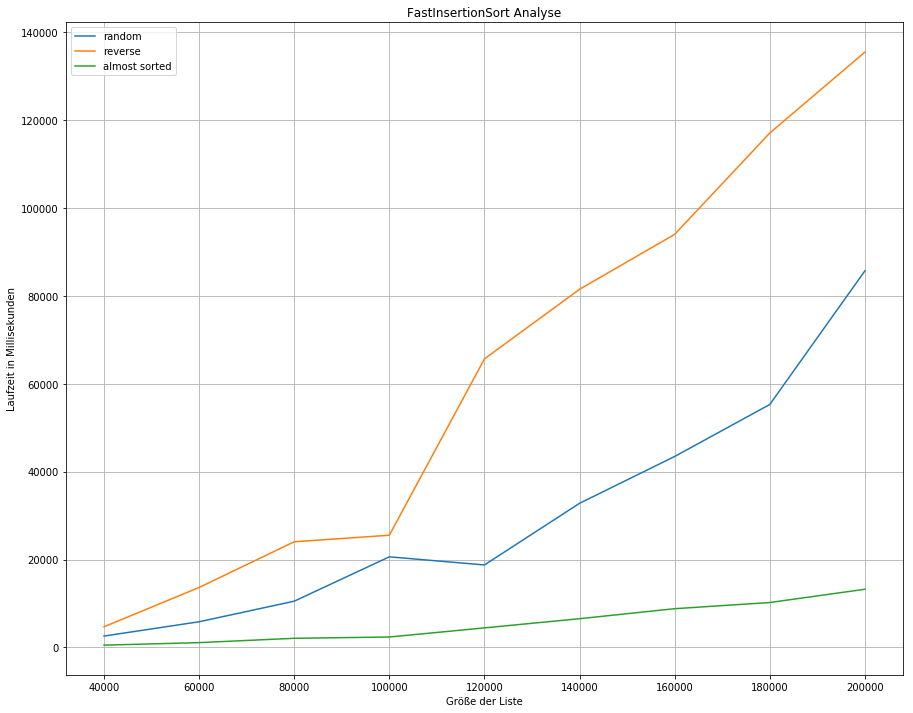

In [10]:
add_plot('FastElements', 'FastInsertionSort', 'RandomPermutation', 'random')
add_plot('FastElements', 'FastInsertionSort', 'ReversePermutation', 'reverse')
add_plot('FastElements', 'FastInsertionSort', 'AlmostSortedPermutation', 'almost sorted')

show_diagram('FastInsertionSort Analyse')

## Analyse SelectionSort

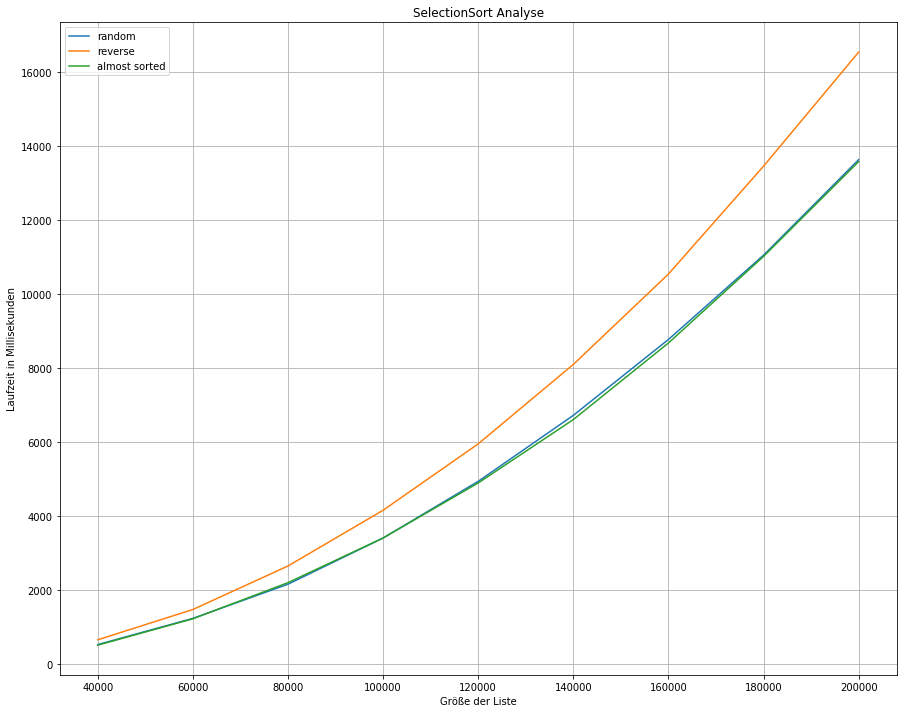

In [11]:
add_plot('FastElements', 'SelectionSort', 'RandomPermutation', 'random')
add_plot('FastElements', 'SelectionSort', 'ReversePermutation', 'reverse')
add_plot('FastElements', 'SelectionSort', 'AlmostSortedPermutation', 'almost sorted')

show_diagram('SelectionSort Analyse')

## FastInsertionSort vs SelectionSort

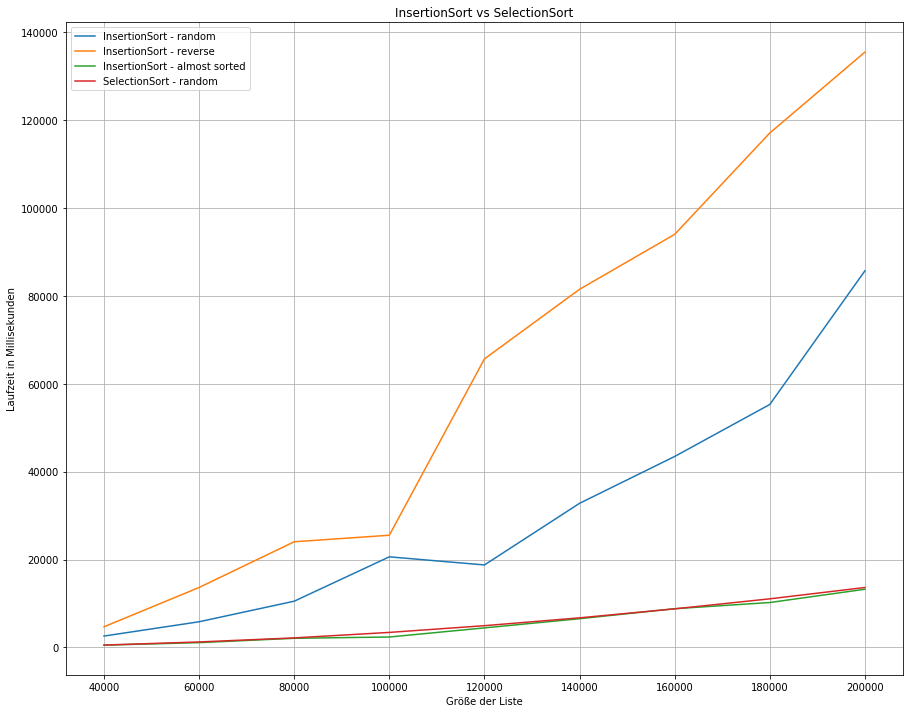

In [12]:
add_plot('FastElements', 'FastInsertionSort', 'RandomPermutation', 'InsertionSort - random')
add_plot('FastElements', 'FastInsertionSort', 'ReversePermutation', 'InsertionSort - reverse')
add_plot('FastElements', 'FastInsertionSort', 'AlmostSortedPermutation', 'InsertionSort - almost sorted')
add_plot('FastElements', 'SelectionSort', 'RandomPermutation', 'SelectionSort - random')

show_diagram('InsertionSort vs SelectionSort')

## Quicksort: iterativ vs rekursiv

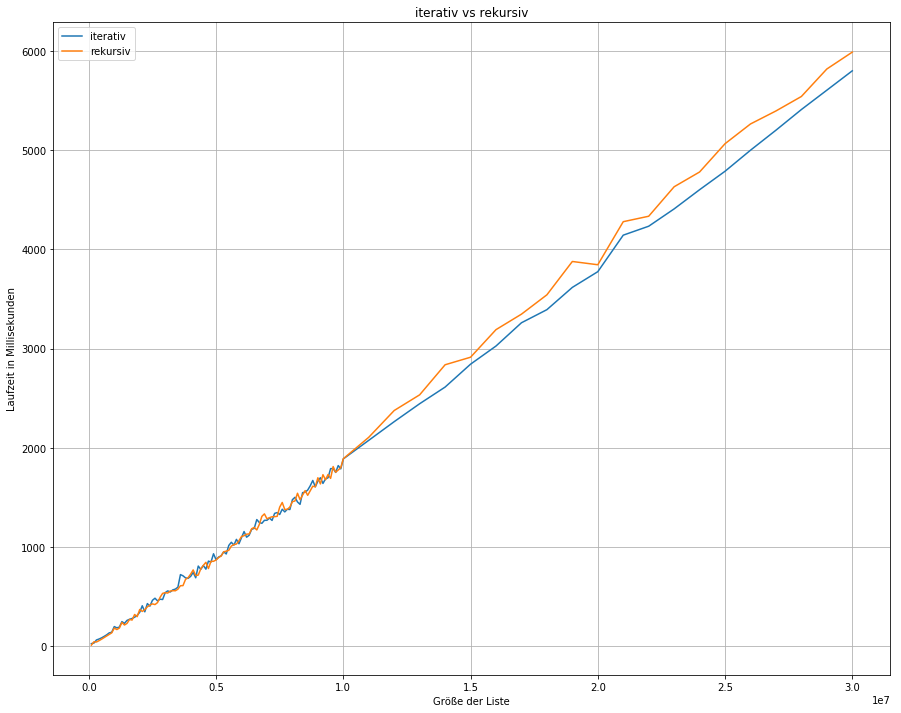

In [13]:
add_plot('FastElements', 'QuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation', 'iterativ')
add_plot('FastElements', 'QuickSort(MEDIAN_OF_THREE)', 'RandomPermutation', 'rekursiv')

show_diagram('iterativ vs rekursiv')

## Optimize Quicksort

### Iteratives Quicksort vs SelectionSort

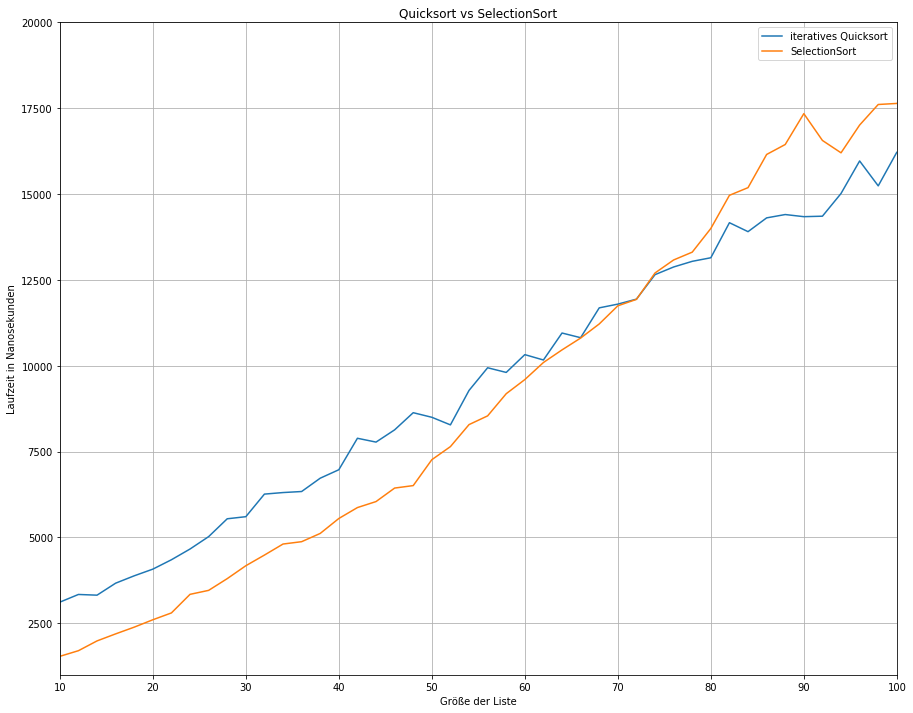

In [14]:
raw_data_nano = pd.read_csv('data/Analyse_nano.csv', header=None)
raw_data_nano.columns = ['list_type', 'sort', 'permutation', 'size', 'comparison', 'time', 'pivot']

data_nano = raw_data_nano.groupby(['list_type', 'sort', 'permutation', 'size']).mean()

y = data_nano.loc['FastElements', 'QuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation']['time'] 
x = y.index.values
plt.plot(x, y, label='iteratives Quicksort')

y = data_nano.loc['FastElements', 'SelectionSort', 'RandomPermutation']['time'] 
x = y.index.values
plt.plot(x, y, label='SelectionSort')

x1,x2,y1,y2 = plt.axis()
plt.axis((10, 100, 1000, 20000))

plt.legend()
plt.title('Quicksort vs SelectionSort')
plt.xlabel('Größe der Liste')
plt.ylabel('Laufzeit in Nanosekunden')
plt.grid()

### OptimizedQuicksort vs Quicksort 

Zunächst wurde die Klasse Quicksort vererbt und nur die Methode zur iterativen Sortierung wurde überschrieben. Dadurch wurde dann bei der Analyse festgestellt, dass die "optimierte" QuickSort-Variante langsamer war als die normale, iterative Variante. Danach wurde die Klasse OptimizedQuickSort direkt von der Oberklasse AbstractSort vererbt, um die Polymorphie während des Sortierverfahrens außen vor zu lassen. Die Konklusion dessen war, die Verschlechterung lag an der Polymorphie.

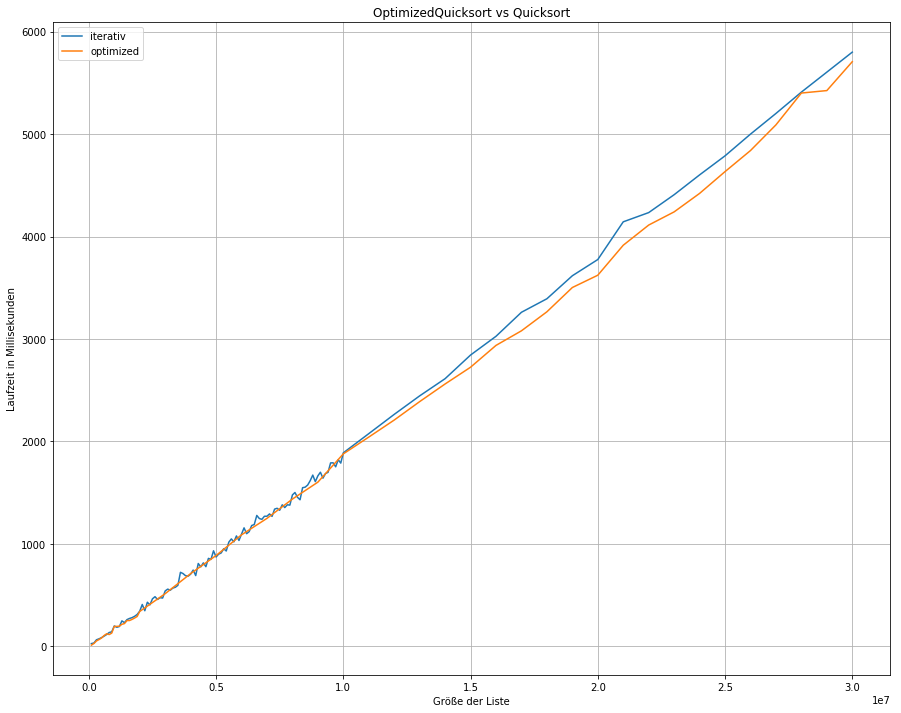

In [15]:
add_plot('FastElements', 'QuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation', 'iterativ')
add_plot('FastElements', 'OptimizedQuickSort', 'RandomPermutation', 'optimized')

show_diagram('OptimizedQuicksort vs Quicksort')

## Heapsort

### PrimitiveHeapsort vs Heapsort

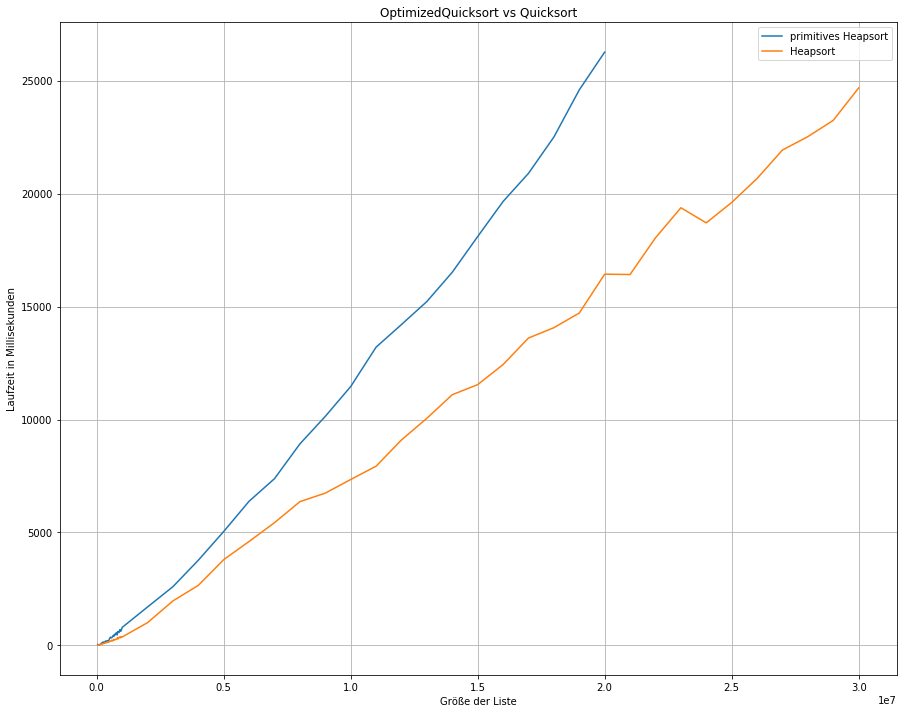

In [16]:
add_plot('FastElements', 'PrimitiveHeapSort', 'RandomPermutation', 'primitives Heapsort')
add_plot('FastElements', 'HeapSort', 'RandomPermutation', 'Heapsort')

show_diagram('OptimizedQuicksort vs Quicksort')

### Heapsort vs OptimizedQuicksort

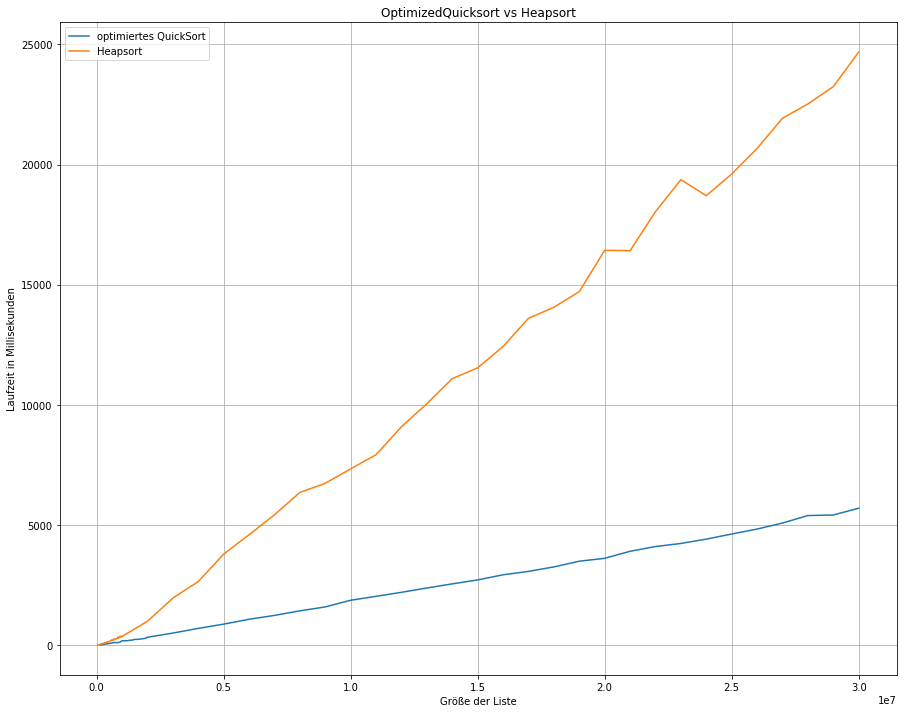

In [17]:
add_plot('FastElements', 'OptimizedQuickSort', 'RandomPermutation', 'optimiertes QuickSort')
add_plot('FastElements', 'HeapSort', 'RandomPermutation', 'Heapsort')

show_diagram('OptimizedQuicksort vs Heapsort')